## Import Libraries

In [1]:
import os
import cv2
from PIL import Image
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split

2024-12-23 21:54:35.629385: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-23 21:54:38.484748: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## EDA and Data Preparation

In [2]:
os.listdir('../artifacts/data_ingestion/rice_leaf_diseases')

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [ ]:
data_path = Path('../artifacts/data_ingestion/rice_leaf_diseases')
bacteria=list(data_path.glob("Bacterial leaf blight/*"))
brown=list(data_path.glob("Brown spot/*"))
smut = list(data_path.glob("Leaf smut/*"))
data = {"bacteria": bacteria, "brown": brown, "smut": smut}
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2
}
X, y = [], []

for class_name, images in data.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(labels_dict[class_name])
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [3]:
data_path = Path('../artifacts/data_ingestion/rice_leaf_diseases')

In [4]:
bacteria=list(data_path.glob("Bacterial leaf blight/*"))
len(bacteria)

40

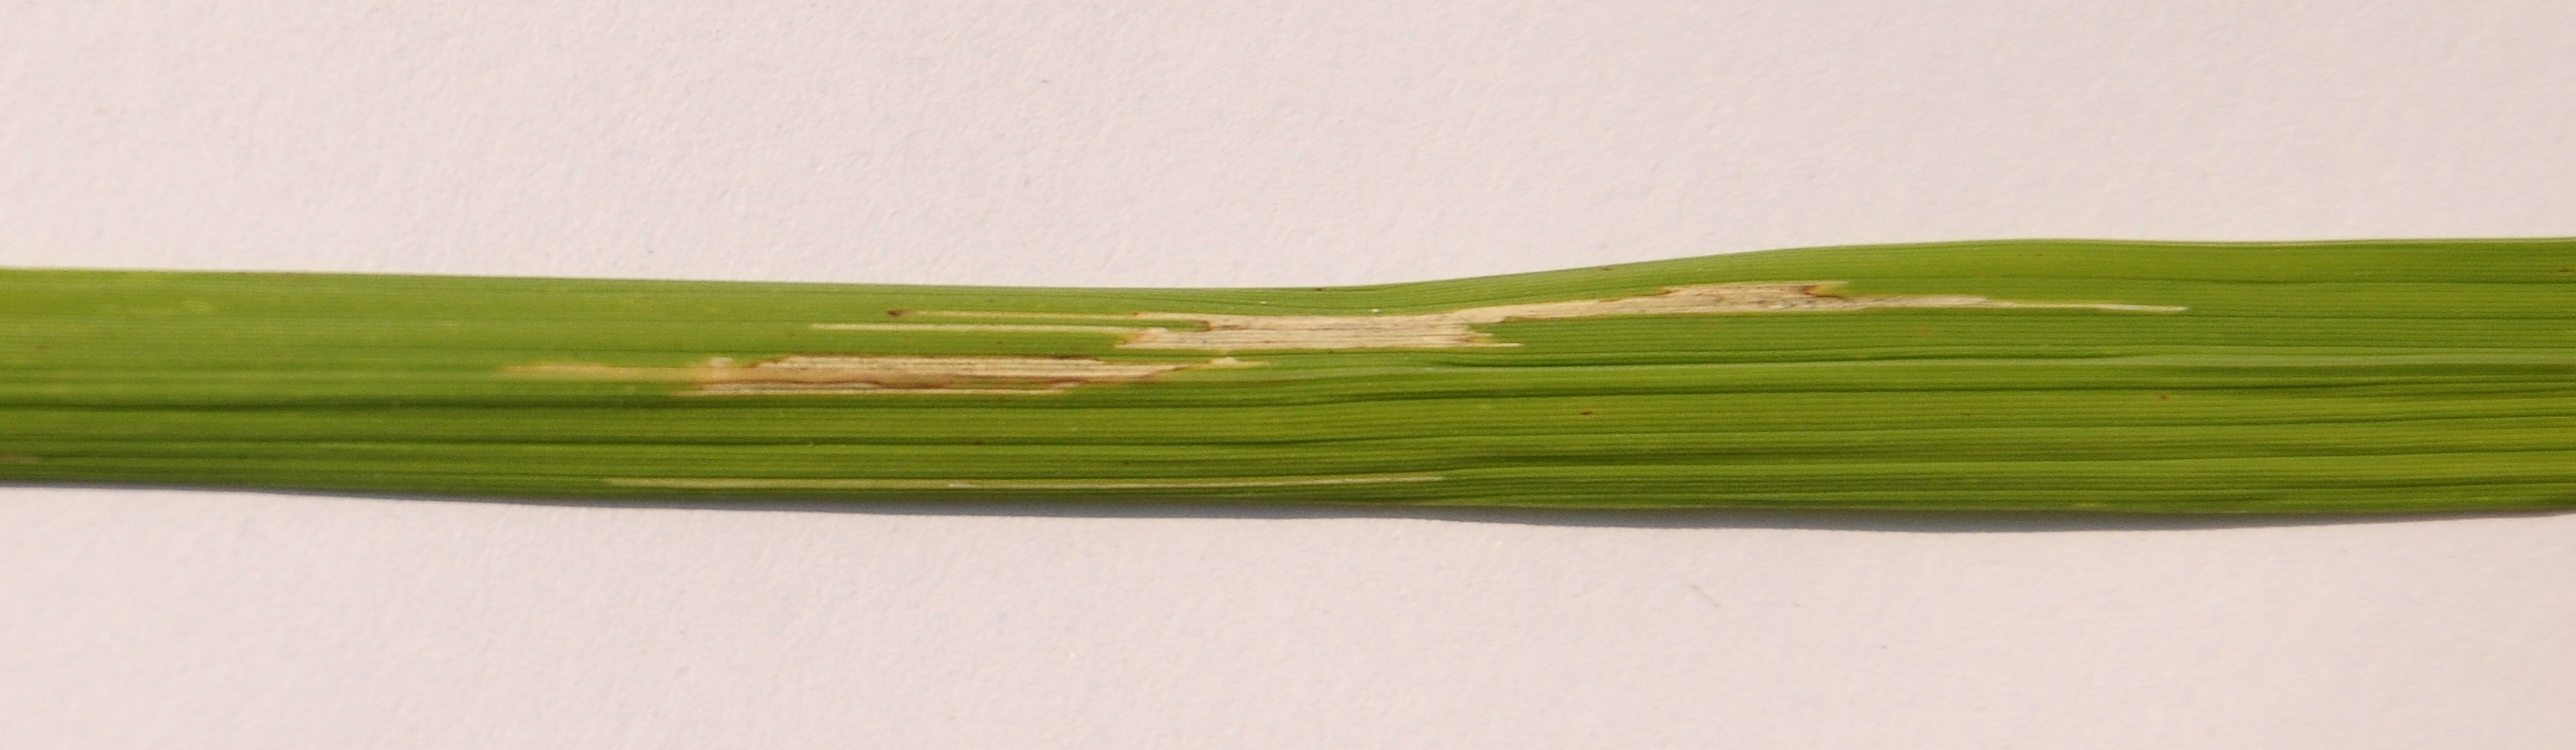

In [5]:
Image.open(str(bacteria[0]))

In [6]:
brown=list(data_path.glob("Brown spot/*"))
len(brown)

40

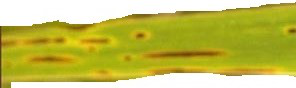

In [7]:
Image.open(str(brown[0]))

In [8]:
smut = list(data_path.glob("Leaf smut/*"))
len(smut)

40

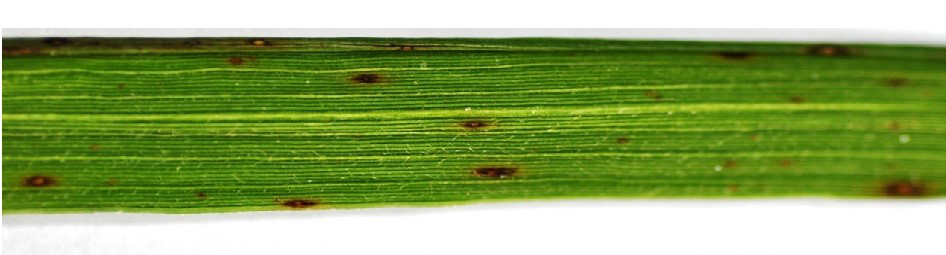

In [9]:
Image.open(str(smut[0]))

In [10]:
data = {"bacteria": bacteria, "brown": brown, "smut": smut}

In [11]:
data['smut'][0]

PosixPath('../artifacts/data_ingestion/rice_leaf_diseases/Leaf smut/DSC_0505.jpg')

In [12]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2
}

In [13]:
X, y = [], []

for class_name, images in data.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(labels_dict[class_name])

In [14]:
len(X)

120

In [15]:
len(y)

120

In [16]:
y[:3]

[0, 0, 0]

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
type(X)

numpy.ndarray

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([29, 29, 32]))

In [21]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([11, 11,  8]))

In [22]:
print(len(y_train))
print(len(y_test))

90
30


In [23]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

## Building the model

In [24]:
num_classes = 3
HEIGHT = 180
WIDTH = 180
NUM_CHANNELS = 3

In [46]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(HEIGHT, WIDTH, NUM_CHANNELS)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # Dropout after first Conv2D layer

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # Dropout after second Conv2D layer

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(num_classes, activation='softmax')
])

In [47]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3274 - loss: 4.8315
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2828 - loss: 3.7684
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3330 - loss: 1.4406
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3457 - loss: 1.1285
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3497 - loss: 1.0973
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3457 - loss: 1.0973
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 938ms/step - accuracy: 0.3301 - loss: 1.0995
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4004 - loss: 1.0964
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3731 - loss: 1.0954
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3848 - loss: 1.0938
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3363 - loss: 1.0977
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3669 - loss: 1.0948
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━

In [49]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - accuracy: 0.7333 - loss: 0.6694


[0.6694252490997314, 0.7333333492279053]